<h1><center>STORY EVALUATION CHALLENGE</center></h1>

## Setup

1. Copy `config.example.py` to `config.py`
2. Edit `config.py` and add your server URL
3. Run the notebook

## Project Overview

This notebook implements an automated story evaluation system using multiple Large Language Models (LLMs) hosted on a local Ollama server. The system analyzes stories across six key literary dimensions and compares the performance of different models and prompting strategies.

Import libraries and connect to ollama server

In [ ]:
from ollama import Client
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import SERVER_URL

ollama_client = Client(host=SERVER_URL)

Load prompts and stories

In [2]:
with open('prompt_with_examples.txt', "r", encoding="utf-8") as f:
    contentEx = f.read()

promptEx = contentEx.replace("\n", "")

with open('prompt_no_examples.txt', "r", encoding="utf-8") as f:
    contentNoEx = f.read()

promptNoEx = contentNoEx.replace("\n", "")

with open('detective_stories.json', encoding='utf-8') as f:
    stories = json.load(f)

with open('high quality story.txt', "r", encoding="utf-8") as f:
    content = f.read()

GoodStory = content.replace("\n", "")

with open('poor story.txt', "r", encoding="utf-8") as f:
    content = f.read()

BadStory = content.replace("\n", "")


Choose a certain story and load its content

In [3]:
id = 200
story = next((s for s in stories if s['id'] == id), None)

if story:
    premise, title, events = story['premise'], story['title'], story['events']

story_text = ' '.join(events).replace('\n', '')
premise_text = ' '.join(premise).replace('\n', '')

Prompt llama 3.1 70b with chosen story

In [4]:
print('Few-shot prompt:\n')
response = ollama_client.chat(model="llama3.1:70b", messages=[
{
"role": "user",
"content": promptEx + "\n" + premise_text + '\n' + title + '\n' + story_text
},
])
print(response["message"]["content"] + '\n')
print('Zero-shot prompt:\n')
response = ollama_client.chat(model="llama3.1:70b", messages=[
{
"role": "user",
"content": promptNoEx + "\n" + premise_text + '\n' + title + '\n' + story_text
},
])
print(response["message"]["content"])

Few-shot prompt:

Here is the evaluation of the story according to the 6 metrics:

**Relevance: 6/10**
The story is set in a historical context and touches on themes of revenge, blackmail, and deception, which are relevant to human nature. However, it doesn't necessarily resonate with contemporary societal issues or have a significant impact on personal lives.

**Coherence: 9/10**
The narrative flows well, with each scene building upon the previous one to create a cohesive story. The author does an excellent job of connecting the dots and providing a clear cause-and-effect relationship between events.

**Empathy: 7/10**
While we are introduced to several characters, including Hercule Poirot, the suspect, and Jean Lacheneur, we don't get to delve too deeply into their emotional lives. The story primarily focuses on the mystery and plot twists rather than character development and emotional resonance.

**Surprise: 8/10**
The story has some unexpected turns, particularly with the revelati

Prompt Qwen 3 30b with chosen story

In [ ]:
print('Few-shot prompt:\n')
response = ollama_client.chat(model="qwen3:30b", messages=[
{
"role": "user",
"content": promptEx + "\n" + premise_text + '\n' + title + '\n' + story_text
},
])
print(response["message"]["content"] + '\n')
print('Zero-shot prompt:\n')
response = ollama_client.chat(model="qwen3:30b", messages=[
{
"role": "user",
"content": promptNoEx + "\n" + premise_text + '\n' + title + '\n' + story_text
},
])
print(response["message"]["content"])

Few-shot prompt:

1. Relevance: 3  
2. Coherence: 9  
3. Empathy: 4  
4. Surprise: 5  
5. Engagement: 7  
6. Complexity: 4

Zero-shot prompt:

Relevance: 7
Coherence: 9
Empathy: 6
Surprise: 5
Engagement: 8
Complexity: 7


Prompt DeepSeek R1 70b with chosen story

In [ ]:
print('Few-shot prompt:\n')
response = ollama_client.chat(model="deepseek-r1:70b", messages=[
{
"role": "user",
"content": promptEx + "\n" + premise_text + '\n' + title + '\n' + story_text
},
])
print(response["message"]["content"] + '\n')
print('Zero-shot prompt:\n')
response = ollama_client.chat(model="deepseek-r1:70b", messages=[
{
"role": "user",
"content": promptNoEx + "\n" + premise_text + '\n' + title + '\n' + story_text
},
])
print(response["message"]["content"])

Few-shot prompt:

**Evaluation of "The Poivrière Enigma"**

1. **Relevance: 8/10**
   - The story effectively explores themes such as revenge, blackmail, and betrayal, which are relevant to societal issues and human nature. These elements resonate well with readers.

2. **Coherence: 9/10**
   - The narrative is well-structured and logical, with each clue leading naturally to the next. There are no noticeable contradictions or gaps in the storyline.

3. **Empathy: 7/10**
   - While emotions like fear and anger are present, the story doesn't delve deeply into the characters' inner lives beyond their immediate situations, limiting emotional depth.

4. **Surprise: 6/10**
   - The twists, such as Lacheneur's involvement, are engaging but not shocking. The classic whodunit structure makes the ending somewhat predictable.

5. **Engagement: 8/10**
   - The story captivates with a good pace and intriguing clues, maintaining interest from start to finish through Poirot's methodical investigation

Create dataframes for each prompted LLM and fill the output values

In [ ]:
df_llama = pd.DataFrame(columns=["Relevance", "Coherence", "Empathy", "Surprise", "Engagement", "Complexity"])
df_qwen = pd.DataFrame(columns=["Relevance", "Coherence", "Empathy", "Surprise", "Engagement", "Complexity"])
df_deepseek = pd.DataFrame(columns=["Relevance", "Coherence", "Empathy", "Surprise", "Engagement", "Complexity"])

df_llama.loc["few-shot"] = [8, 9, 7, 8, 9, 8]
df_llama.loc["zero-shot"] = [8, 9, 7, 8, 9, 8]
df_qwen.loc["few-shot"] = [3, 9, 4, 5, 7, 4]
df_qwen.loc["zero-shot"] = [7, 9, 6, 5, 8, 7]
df_deepseek.loc["few-shot"] = [8, 9, 7, 6, 8, 8]
df_deepseek.loc["zero-shot"] = [9, 9, 8, 6, 8, 7]

Create visualization for results of a chosen detective story 

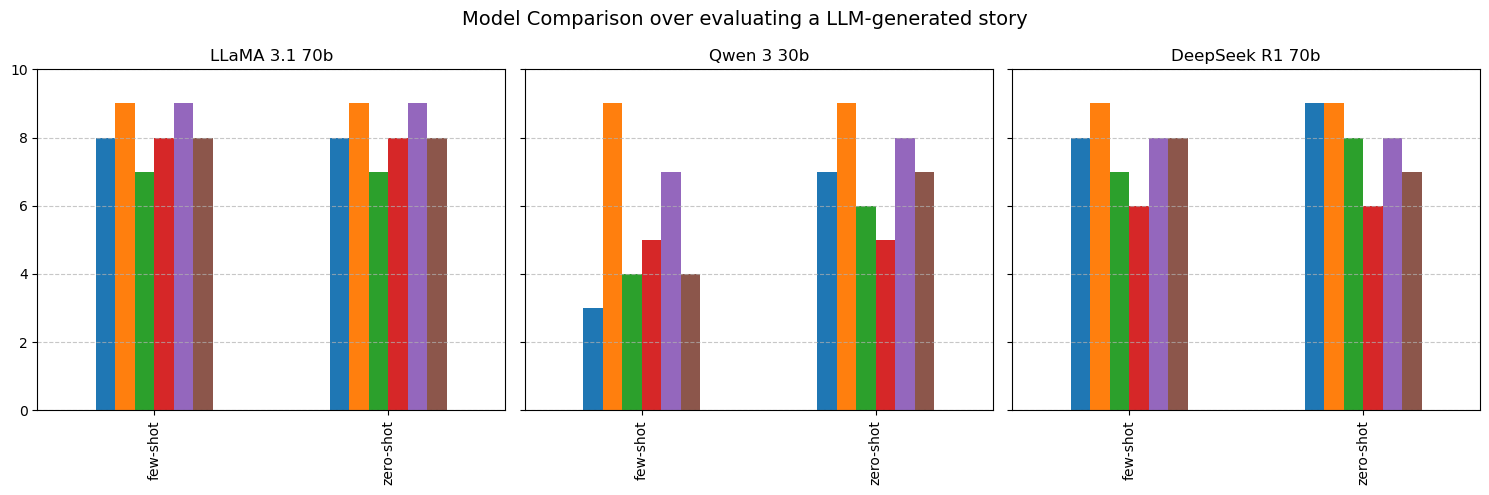

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for ax, (df, title) in zip(axes, [(df_llama, "LLaMA 3.1 70b"), (df_qwen, "Qwen 3 30b"), (df_deepseek, "DeepSeek R1 70b")]):
    df.plot(kind="bar", ax=ax, legend=False, ylim=(0,10), title=title)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

fig.suptitle("Model Comparison over evaluating a LLM-generated detective story", fontsize=14)
plt.tight_layout()
plt.show()

On this visualization we can see that Qwen has significantly different result, than for example DeepSeek and LLaMA between each other.

Not only that, but few-shot and zero-shot outcome of Qwen differs as well, something that neither DeepSeek nor LLaMA has. We can see that **few-shot prompt slightly decreases** the outcome here, except for a second metric - **Coherence** (the story makes sense), which was graded the same by all LLMs.

Prompt Qwen, Llama and Deepseek with good story via few-shot prompt

In [ ]:
print('Qwen' + '\n')
response = ollama_client.chat(model="qwen3:30b", messages=[
{
"role": "user",
"content": promptEx + "\n" + GoodStory
},
])
print(response["message"]["content"] + '\n')
print('Llama' + '\n')
response = ollama_client.chat(model="llama3.1:70b", messages=[
{
"role": "user",
"content": promptEx + "\n" + GoodStory
},
])
print(response["message"]["content"] + '\n')
print('DeepSeek' + '\n')
response = ollama_client.chat(model="deepseek-r1:70b", messages=[
{
"role": "user",
"content": promptEx + "\n" + GoodStory
},
])
print(response["message"]["content"] + '\n')

Qwen

Relevance: 9
Coherence: 10
Empathy: 9
Surprise: 8
Engagement: 10
Complexity: 9

Llama

Here is the evaluation of "The Gift of the Magi" by O. Henry according to the 6 metrics:

**Relevance: 8/10**
The story explores themes of love, sacrifice, and gift-giving during Christmas time, which resonates with many readers.

**Coherence: 9/10**
The narrative flows smoothly from one scene to another, with a clear cause-and-effect relationship between events. The story is well-structured and easy to follow.

**Empathy: 8/10**
Della's emotions are conveyed through her actions and dialogue, allowing the reader to understand her motivations and feelings. Jim's character, however, is less developed in terms of emotional expression.

**Surprise: 6/10**
While the story has a heartwarming twist at the end, it's not entirely unpredictable. The sacrifice that Della makes for Jim's present can be anticipated, although the specific details are not revealed until the end.

**Engagement: 7/10**
The stor

Prompt Qwen, Llama and Deepseek with bad story via few-shot prompt

In [ ]:
print('Qwen' + '\n')
response = ollama_client.chat(model="qwen3:30b", messages=[
{
"role": "user",
"content": promptEx + "\n" + BadStory
},
])
print(response["message"]["content"] + '\n')
print('Llama' + '\n')
response = ollama_client.chat(model="llama3.1:70b", messages=[
{
"role": "user",
"content": promptEx + "\n" + BadStory
},
])
print(response["message"]["content"] + '\n')
print('DeepSeek' + '\n')
response = ollama_client.chat(model="deepseek-r1:70b", messages=[
{
"role": "user",
"content": promptEx + "\n" + BadStory
},
])
print(response["message"]["content"] + '\n')

Qwen

Relevance: 1  
Coherence: 1  
Empathy: 0  
Surprise: 1  
Engagement: 1  
Complexity: 1

Llama

Here are my evaluations of "THE MOST EPICLY AWESOMEST STORY! EVER!!" by Randy Henderson according to the 6 metrics:

**Relevance: 2**
The story doesn't seem to resonate with society or have any deeper meaning. It appears to be a humorous, over-the-top parody of epic fantasy stories.

**Coherence: 4**
The story has some coherence, but it's often interrupted by non-sequiturs (e.g., the flashback about the whorehouse) and absurd events (e.g., the beast being shot out of an airlock in space). The narrative is not always consistent or logical.

**Empathy: 1**
It's difficult to empathize with Framdar, as he's portrayed more like a caricature than a fully fleshed-out character. His emotions are not clearly conveyed, and his actions seem driven by plot convenience rather than any genuine emotional motivation.

**Surprise: 6**
While the story is unpredictable in its absurdity, it doesn't have an

Prompt Qwen, Llama and Deepseek with good story via zero-shot prompt

In [ ]:
print('Qwen' + '\n')
response = ollama_client.chat(model="qwen3:30b", messages=[
{
"role": "user",
"content": promptNoEx + "\n" + GoodStory
},
])
print(response["message"]["content"] + '\n')
print('Llama' + '\n')
response = ollama_client.chat(model="llama3.1:70b", messages=[
{
"role": "user",
"content": promptNoEx + "\n" + GoodStory
},
])
print(response["message"]["content"] + '\n')
print('DeepSeek' + '\n')
response = ollama_client.chat(model="deepseek-r1:70b", messages=[
{
"role": "user",
"content": promptNoEx + "\n" + GoodStory
},
])
print(response["message"]["content"] + '\n')

Qwen

Relevance: 9
Coherence: 10
Empathy: 10
Surprise: 9
Engagement: 10
Complexity: 9

Llama

Here is my evaluation of "The Gift of the Magi" by O. Henry according to the 6 metrics:

**Relevance: 8/10**
The story explores themes of love, sacrifice, and the true meaning of gift-giving, which are still relevant today.

**Coherence: 9/10**
The narrative is well-structured, with a clear cause-and-effect relationship between events. The story flows smoothly from one scene to the next, making it easy to follow.

**Empathy: 8.5/10**
The characters' emotions are well-conveyed, particularly Della's desperation and Jim's surprise. However, some of their emotional transitions feel a bit rushed or convenient.

**Surprise: 7/10**
While the twist at the end is somewhat predictable, it still has an impact on the reader. The story balances predictability and novelty fairly well.

**Engagement: 8.5/10**
The narrative is engaging and easy to follow, with vivid descriptions of settings and characters. Ho

Prompt Qwen, Llama and Deepseek with bad story via zero-shot prompt

In [ ]:
print('Qwen' + '\n')
response = ollama_client.chat(model="qwen3:30b", messages=[
{
"role": "user",
"content": promptNoEx + "\n" + BadStory
},
])
print(response["message"]["content"] + '\n')
print('Llama' + '\n')
response = ollama_client.chat(model="llama3.1:70b", messages=[
{
"role": "user",
"content": promptNoEx + "\n" + BadStory
},
])
print(response["message"]["content"] + '\n')
print('DeepSeek' + '\n')
response = ollama_client.chat(model="deepseek-r1:70b", messages=[
{
"role": "user",
"content": promptNoEx + "\n" + BadStory
},
])
print(response["message"]["content"] + '\n')

Qwen

Relevance: 1
Coherence: 2
Empathy: 1
Surprise: 2
Engagement: 2
Complexity: 1

Llama

Here are my evaluations for each metric:

**Relevance: 4**
The story attempts to resonate with societal concerns about environmental doom and corruption, but it feels shallow and unexplored.

**Coherence: 6**
The story has some narrative flow issues, such as the abrupt flashback mention that doesn't actually happen. The cause-and-effect relationship is mostly clear, but the story relies on convenient plot devices (e.g., the magical birth, the prophecy).

**Empathy: 3**
Framdar's emotions are somewhat conveyed, but they feel superficial and lack depth. His character development is mainly focused on his appearance and combat prowess.

**Surprise: 7**
The ending has some unexpected elements, such as the beast being shot out of an airlock in space (which raises questions about the setting). However, the overall plot twist isn't entirely surprising or impactful.

**Engagement: 8**
Despite its flaws, t

Create dataframes for each LLM prompted, fill in the grading score

In [ ]:
df_llama_good = pd.DataFrame(columns=["Relevance", "Coherence", "Empathy", "Surprise", "Engagement", "Complexity"])
df_qwen_good = pd.DataFrame(columns=["Relevance", "Coherence", "Empathy", "Surprise", "Engagement", "Complexity"])
df_deepseek_good = pd.DataFrame(columns=["Relevance", "Coherence", "Empathy", "Surprise", "Engagement", "Complexity"])

df_llama_bad = pd.DataFrame(columns=["Relevance", "Coherence", "Empathy", "Surprise", "Engagement", "Complexity"])
df_qwen_bad = pd.DataFrame(columns=["Relevance", "Coherence", "Empathy", "Surprise", "Engagement", "Complexity"])
df_deepseek_bad = pd.DataFrame(columns=["Relevance", "Coherence", "Empathy", "Surprise", "Engagement", "Complexity"])

df_qwen_good.loc["few-shot"] = [9, 10, 9, 8, 10, 9]
df_qwen_good.loc["zero-shot"] = [9, 10, 10, 9, 10, 9]
df_llama_good.loc["few-shot"] = [8, 9, 8, 6, 7, 4]
df_llama_good.loc["zero-shot"] = [8, 9, 8.5, 7, 8.5, 7.5]
df_deepseek_good.loc["few-shot"] = [9, 8, 10, 9, 9, 7]
df_deepseek_good.loc["zero-shot"] = [9, 9, 10, 9, 8, 7]   

df_qwen_bad.loc["few-shot"] = [1, 1, 0, 1, 1, 1]
df_qwen_bad.loc["zero-shot"] = [1, 2, 1, 2, 2, 1]
df_llama_bad.loc["few-shot"] = [2, 4, 1, 6, 8, 1]
df_llama_bad.loc["zero-shot"] = [4, 6, 3, 7, 8, 5]
df_deepseek_bad.loc["few-shot"] = [3, 4, 2, 4, 6, 2]
df_deepseek_bad.loc["zero-shot"] = [3, 4, 2, 2, 4, 3]   

Visualize the mean of score in good story and bad story for each LLM

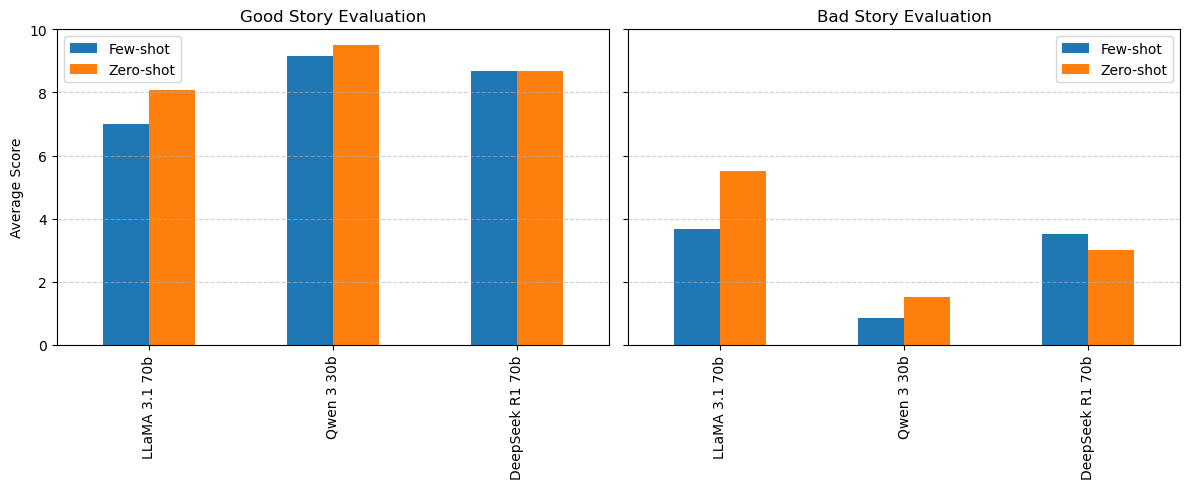

In [ ]:
good_data = {
    "Few-shot": [
        df_llama_good.loc["few-shot"].mean(),
        df_qwen_good.loc["few-shot"].mean(),
        df_deepseek_good.loc["few-shot"].mean()
    ],
    "Zero-shot": [
        df_llama_good.loc["zero-shot"].mean(),
        df_qwen_good.loc["zero-shot"].mean(),
        df_deepseek_good.loc["zero-shot"].mean()
    ]
}

bad_data = {
    "Few-shot": [
        df_llama_bad.loc["few-shot"].mean(),
        df_qwen_bad.loc["few-shot"].mean(),
        df_deepseek_bad.loc["few-shot"].mean()
    ],
    "Zero-shot": [
        df_llama_bad.loc["zero-shot"].mean(),
        df_qwen_bad.loc["zero-shot"].mean(),
        df_deepseek_bad.loc["zero-shot"].mean()
    ]
}

models = ["LLaMA 3.1 70b", "Qwen 3 30b", "DeepSeek R1 70b"]

df_good = pd.DataFrame(good_data, index=models)
df_bad = pd.DataFrame(bad_data, index=models)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

df_good.plot(kind="bar", ax=axes[0], title="Good Story Evaluation", ylim=(0, 10))
df_bad.plot(kind="bar", ax=axes[1], title="Bad Story Evaluation", ylim=(0, 10))

for ax in axes:
    ax.set_ylabel("Average Score")
    ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


This visualization shows us again, that few-shot prompting, in our case, slightly decreases results (the majority).

We can also see that LLMs evaluated the good story as high quality, and the bad story as low quality, except for LLaMA 3.1 70b with mean grade higher than 5, which is not usual. DeepSeek R1 70b has slightly "better" results that are closer to the bottom, and Qwen 3 30b has the lowest mean grade, which in my opinion is the fairest, as the chosen bad story is considered the worst worldwide.

Hence my conclusion, that in the case of evaluating stories with my way of prompting and compared to DeepSeek R1 70b and LlaMA 3.1 70b, the model Qwen 3 30b is the fairest.

Here you can try to evaluate your own story: choose the number of a model you want to use, and then choose whether you want to use a few-shot or zero-shot prompt.

In [7]:
models = {
    1: "llama3.1:70b",
    2: "qwen3:30b",
    3: "deepseek-r1:70b"
}

prompt_type = {
    1: promptEx,
    2: promptNoEx
}

print('Choose the number of the model you would like to use:\n1. Llama 3.1 70b\n2.Qwen 3 30b\n3.DeepSeek R1 70b')
model = int(input('What model would you want to try? (1-3)'))

print('\nChoose the type of prompt:\n1. Few-shot\n2. Zero-shot')
prompt = int(input('Do you want to use few-shot or zero-shot prompt?'))

story = input('Input the story you want to evaluate:')

response = ollama_client.chat(model=models.get(model, "Invalid model option"), messages=[
{
"role": "user",
"content": prompt_type.get(prompt, "Invalid prompt option") + '\n' + story
},
])
print(response["message"]["content"])


Choose the number of the model you would like to use:
1. Llama 3.1 70b
2.Qwen 3 30b
3.DeepSeek R1 70b

Choose the type of prompt:
1. Few-shot
2. Zero-shot
Here is my evaluation of "The Ant and the Grasshopper" according to the 6 metrics:

1. **Relevance**: 8/10 (the story teaches a valuable lesson about responsibility and planning, which resonates with people's personal lives)
2. **Coherence**: 9/10 (the story has a clear cause-and-effect relationship and no contradictions; it is easy to follow)
3. **Empathy**: 6/10 (while we can understand the grasshopper's hunger and the ant's frustration, their emotions are not deeply explored or nuanced)
4. **Surprise**: 2/10 (the ending is quite predictable, given the setup of the story)
5. **Engagement**: 7/10 (the story is simple and easy to follow, but it may not hold attention for readers seeking more complex plots or character development)
6. **Complexity**: 3/10 (the story has a straightforward moral lesson, but lacks world depth and descrip